# Pure Python evaluation of vector norms

Generate a list of random floats of a given dimension (dim), and store its result in the variable `vec`.

In [1]:
# This is used for plots and numpy
%pylab inline 

import random
dim = int(1000)

### BEGIN SOLUTION
vec = [random.random() for i in range(dim)]
### END SOLUTION

Populating the interactive namespace from numpy and matplotlib


In [2]:
from numpy.testing import *

assert_equal(type(vec), list)
assert_equal(len(vec), dim)
for ob in vec:
    assert_equal(type(ob), float)

Write a function that evaluates the $l_p$ norm of a vector in $R^d$. We remind:
$$
\|v \|_{p} := \left(\sum_i (v_i)^p\right)^{1/p}
$$

the function should take as arguments a `list`, containing your $R^d$ vector, and a number `p` in the range $[1, \infty]$, indicating the exponent of the norm. 

**Note:** an infinite float number is given by `float("inf")`.

Throw an assertion (look it up on google!) if the exponent is not in the range you expect.

In [3]:
def p_norm(vector,p):
    ### BEGIN SOLUTION
    assert p >= 1, 'The exponent p (you used '+str(p)+') has to be >=1.'
    if p >= 1 and p < float("inf"):
        norm = 0
        for v in vector:
            norm+= abs(v)**p
        exponent = 1./float(p)
        return norm**exponent
    else:
        norm = 0
        for v in vector:
            norm = max(abs(v), norm)
        return norm
    ### END SOLUTION

In [4]:
assert_equal(p_norm(range(10),1), 45.0)
assert_equal(p_norm([3,4], 2), 5.0)

In [5]:
assert_equal(p_norm([-1,-.5,.5], float("inf")), 1)

In [6]:
assert_raises(AssertionError, p_norm, [2,3], 0)
assert_raises(AssertionError, p_norm, [2,3], -1)

# Playing with condition numbers


In this exercise you will have to figure out what are the optimal
values of the stepping interval when approximating derivatives using
the finite difference method. See here_ for a short introduction on
how to run these programs on SISSA machines.

## 1. Finite differences
Write a program to compute the finite difference (`FD`)
approximation of the derivative of a function `f`, computed at
point `x`, using a stepping of size `h`. Recall the definition of
approximate derivative:

$$
FD(f,x,h) := \frac{f(x+h)-f(x)}{h}
$$

In [7]:
def FD(f, x, h):
    ### BEGIN SOLUTION
    return (f(x+h)-f(x))/h
    ### END SOLUTION

In [8]:
assert_equal(FD(lambda x: x, 0, .125), 1.0)

## 2. Compute FD

Evaluate this function for the derivative of `sin(x)` evaluated at `x=1`, for values of `h` equal to `1e-i`, with `i=0,...,20`. Store the values of the finite differences in the list `fd1`.

In [9]:
hs1 = [10.0**(-i) for i in arange(0,21)]
fd1 = [FD(sin, 1.0, h) for h in hs1]

In [10]:
assert_equal(len(fd1), 21)
expected = [0.067826442017785205, 0.49736375253538911, 0.53608598101186899, 0.5398814803603269, 0.54026023141862112, 0.54029809850586474, 0.54030188512133037, 0.54030226404044868, 0.54030229179602429, 0.54030235840940577, 0.54030224738710331, 0.54030113716407868, 0.54034554608506369, 0.53956838996782608, 0.53290705182007514, 0.55511151231257827, 0.0, 0.0, 0.0, 0.0, 0.0]
assert_almost_equal(fd1,expected,decimal=4)

## 3. Error plots

Plot the error, defined as `abs(FD-cos(1.0))` where `FD` is your approximation, in `loglog` format and explain what you see. A good way to emphasize the result is to give the option `'-o'` to the plot command.

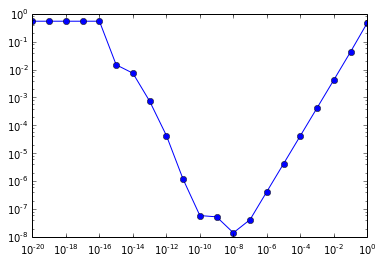

In [11]:
error1 = [abs(fd-cos(1.0)) for fd in fd1]
loglog(hs1, error1, '-o')

Comment

## 4. Error plots base 2
Repeate step 2 and 3 above, but using powers of `2` instead of powers of `10`, i.e., using `h` equal to `2**(-i)` for `i=1,...,60`. Do you see differences? How do you explain these differences? Shortly comment.  A good way to emphasize the result is to give the option `'-o'` to the plot command.

## 3. Error plots

Plot the error, defined as `abs(FD-cos(1.0))` where `FD` is your approximation, in `loglog` format and explain what you see. A good way to emphasize the result is to give the option `'-o'` to the plot command.hs2 = [2**(-i) for i in range(0,60)]
fd2 = [FD(sin, 1.0, h) for h in hs2]
error2 = [abs(fd-cos(1.0)) for fd in fd2]
loglog(hs2, error2, 'o-')

Comment

## 5. Central Finite Differences
Write a function that computes the central finite difference approximation (`CFD`), defined as 

$$
CFD(f,x,h) := \frac{f(x+h)-f(x-h)}{2h}
$$


In [17]:
def CFD(f, x, h):
    ### BEGIN SOLUTION
    return (f(x+h)-f(x-h))/(2*h)
    ### END SOLUTION

In [18]:
assert_equal(CFD(lambda x: x**2, 0.0, .5), 0.0)
assert_equal(CFD(lambda x: x**2, 1.0, .5), 2.0)

## 6. Error plots for CFD

Repeat steps 2., 3. and 4. and explain what you see. What is the *order* of the approximation 1. and what is the order of the approximation 5.? What's the order of the cancellation errors? 

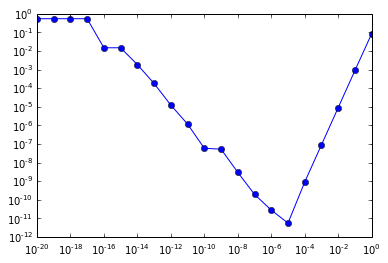

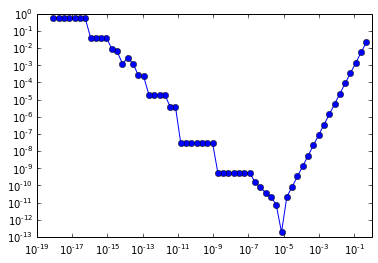

In [20]:
hs2 = array([2.**(-i) for i in range(1, 61)])


cfd1 = [CFD(sin, 1.0, h) for h in hs1]
cfd2 = [CFD(sin, 1.0, h) for h in hs2]

error_cfd1 = [abs(fd-cos(1.0)) for fd in cfd1]
error_cfd2 = [abs(fd-cos(1.0)) for fd in cfd2]

loglog(hs1, error_cfd1, 'o-')
show()
loglog(hs2, error_cfd2, 'o-')

# Numpy

Numpy provides a very powerful array container. The first line of this ipython notebook has imported all of numpy functionalities in your notebook, just as if you typed::

    from numpy import *
    
Create a numpy array whith entries that range form 0 to 64. Use the correct numpy function to do so. Call it `x`. 

In [21]:
x = np.arange(0,64)

In [22]:
assert_equal(type(x), ndarray)
assert_equal(len(x), 64)
for i in xrange(64):
    assert_equal(x[i], float(i))

Reshape the one dimensional array, to become a 4 rows 2 dimensional array, let numpy evaluate the correct number of culumns. Call it `y`.

In [23]:
y = x.reshape(4,-1)

In [24]:
assert_equal(shape(y), (4,16))

Get the following *slices* of `y`:

* All the rows and the first three colums. Name it `sl1`.
* All the colums and the first three rows. Name it `sl2`.
* Third to sixth (included) columns and all the rows. Name it `sl3`.
* The last three columns and all the rows. Name it `sl4`.

In [25]:
sl1 = y[:,:3]
sl2 = y[:3,:]
sl3 = y[:,3:7]
sl4 = y[:,-3:]

In [26]:
assert_equal(sl1,[[0,1,2],[16,17,18],[32,33,34],[48,49,50]])
assert_equal(sl2,[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],[16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31],[32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47]])
assert_equal(sl3,[[3,4,5,6],[19,20,21,22],[35,36,37,38],[51,52,53,54]])
assert_equal(sl4,[[13,14,15],[29,30,31],[45,46,47],[61,62,63]])

Now reshape the array, as if you wanted to feed it to a fortran routine. Call it `z`.

In [27]:
z = x.reshape((4,-1),order='F')

Comment on the result, what has changed with respect to `y`? 

Notice that in the first case the array has been ordered row-wise, while in the second case column wise, because that's the default array ordering in fortran.

Set the fourth element of `x` to 666666, and print `x`, `y`, `z`. Comment on the result

In [28]:
x[3] = 666666
print(x)
print(y)
print(z)

[     0      1      2 666666      4      5      6      7      8      9
     10     11     12     13     14     15     16     17     18     19
     20     21     22     23     24     25     26     27     28     29
     30     31     32     33     34     35     36     37     38     39
     40     41     42     43     44     45     46     47     48     49
     50     51     52     53     54     55     56     57     58     59
     60     61     62     63]
[[     0      1      2 666666      4      5      6      7      8      9
      10     11     12     13     14     15]
 [    16     17     18     19     20     21     22     23     24     25
      26     27     28     29     30     31]
 [    32     33     34     35     36     37     38     39     40     41
      42     43     44     45     46     47]
 [    48     49     50     51     52     53     54     55     56     57
      58     59     60     61     62     63]]
[[     0      4      8     12     16     20     24     28     32     36
   

Any variable in python, except built in types, are pointers to addresses in memory. When we assigned y=x,  z=x, we asked python to setup a pointer called y to the memory pointed by x. We did exactely the same thing when we assigned z=x. Result: x, y, and z are pointing to the same mememory. When we changed one value inside the memory of x, yand z where still poiting to the same memory. Consequence: changing one entry of x, changed the corresponding value in y and z.
Cons: This behaviour might seem misleading, and sometimes it is. The programmer should be aware of what he is doing.
Pros: Memory saving.

## Arrays and Matrices

Define 2 arrays, `A` of dimensions (2,3) and `B` of dimension (3,4).

* Perform the operation `C = A.dot(B)`. Comment the result, or the error you get.

In [29]:
### BEGIN SOLUTION
A = array([[1,2,3],[4,5,6]])
B = array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
C = A.dot(B)
### END SOLUTION

In [30]:
assert_equal(A.shape,(2,3))
assert_equal(B.shape,(3,4))
assert_equal(C.shape,(2,4))
expected = sum(A[1,:]*B[:,2])
assert_equal(C[1,2],expected)

I perform the matrix-matrix multiplication between two dimensional arrays.

* Perform the operation `C = A*(B)`. Comment the result, or the error you get.

In [31]:
C = A*B

ValueError: operands could not be broadcast together with shapes (2,3) (3,4) 

 In the second I multiply element by element the two and I get an error.

 * Convert A and B, from arrays to matrices and perform `A*B`. Comment the result.

In [32]:
### BEGIN SOLUTION
A = asmatrix(A)
B = asmatrix(B)
C = A*B
### END SOLUTION

In [33]:
assert_equal(type(A),numpy.matrixlib.defmatrix.matrix)
assert_equal(type(B),numpy.matrixlib.defmatrix.matrix)
assert_equal(type(C),numpy.matrixlib.defmatrix.matrix)
assert_equal(A.shape,(2,3))
assert_equal(B.shape,(3,4))
assert_equal(C.shape,(2,4))
expected = sum(A[1,:]*B[:,2])
assert_equal(C[1,2],expected)

Perform matrix matrix multiplication.

# Playing with polynomials

The polynomial `(1-x)^6` can be expanded to::
     
     x^6 - 6*x^5 + 15*x^4 - 20*x^3 + 15*x^2 - 6*x + 1

   The two forms above are equivalent from a mathematical point of
   view, but may yield different results in a computer machine.

   Compute and plot the values of this polynomial, using each of the
   two forms, for 101 equally spaced points in the interval
   `[0.995,1.005]`, i.e., with a spacing of 0.0001 (use linspace).
   
   Can you explain this behavior?


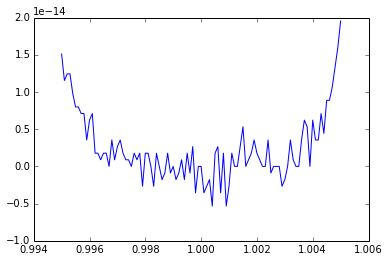

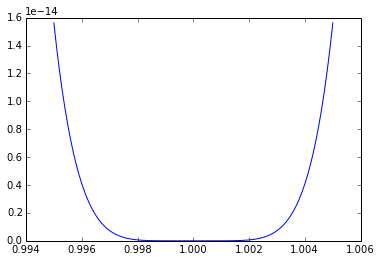

In [34]:
x = linspace(0.995, 1.005, 101)
p1 = x**6 - 6*x**5 + 15*x**4 - 20*x**3 + 15*x**2 - 6*x + 1
p2 = (1-x)**6

plot(x, p1)
show()
plot(x,p2)

We see cancellation errors at its maximum power. We are summing numbers which are very close to each other, with opposite signs, when computing using the first method.

**Playing with interpolation in python**

1. Given a set of $n+1$ points $x_i$ as input (either a list of floats, or a numpy array of floats), construct a function `lagrange_basis(xi,i,x)` that returns the $i$-th Lagrange
polynomial associated to $x_i$, evaluated at $x$. The $i$-th Lagrange polynomial is defined as polynomial of degree $n$ such that $l_i(x_j) = \delta_{ij}$, where $\delta$ is one if $i == j$ and zero otherwise.
   
Recall the mathematical definition of the $l_i(x)$ polynomials:

$$
l_i(x) := \prod_{j=0, j\neq i}^{n} \frac{x-x_j}{x_i-x_j}
$$


In [35]:
def lagrange_basis(xi, i, x):
    ### BEGIN SOLUTION
    assert i<len(xi) and i>=0, 'Out of range: 0 < i < len(xi)'
    ret = 1;
    for xj in xi[range(i)+range(i+1,len(xi))]:
        ret *= (x-xj)/(xi[i]-xj)
    return ret
    ### END SOLUTION

In [36]:
x = linspace(0,1,5)
d = 3
xi = linspace(0,1,d)

assert_equal(list(lagrange_basis(xi, 0, x)),[1.0, 0.375, -0.0, -0.125, 0.0])
assert_equal(list(lagrange_basis(xi, 1, x)),[0.0, 0.75, 1.0, 0.75, -0.0])
assert_equal(list(lagrange_basis(xi, 2, x)),[-0.0, -0.125, 0.0, 0.375, 1.0])

assert_raises(AssertionError, lagrange_basis, xi, -1, x)
assert_raises(AssertionError, lagrange_basis, xi, 10, x)

Construct the function `lagrange_interpolation(xi,g)` that, given the set of interpolation points `xi` and a function `g`, it returns **another function** that when evaluated at **x** returns the Lagrange interpolation polynomial of `g` defined as 

$$
 \mathcal{L} g(x) := \sum_{i=0}^n g(x_i) l_i(x)
$$

You could use this function as follows::

    Lg = lagrange_interpolation(xi, g)
    xi = linspace(0,1,101)
    plot(x, g(x))
    plot(x, Lg(x))
    plot(xi, g(xi), 'or')

In [37]:
def lagrange_interpolation(xi,f):
    ### BEGIN SOLUTION
    def lagrange(xi,f,x): 
        r = 0;
        for i in xrange(len(xi)):
            r += lagrange_basis(xi,i,x)*f(xi[i])
        return r
    return lambda x: lagrange(xi,f,x)
    ### END SOLUTION

In [38]:
# Check for polynomials. This should be **exact**
g = lambda x: x**3+x**2

xi = linspace(0,1,4)
Lg = lagrange_interpolation(xi, g)

x = linspace(0,1,1001)

assert p_norm(g(x) - Lg(x),float('inf')) < 1e-15, 'This should be zero...'